# Image Processing

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np   

## Image threshold
#### ret, dst = cv2.threshold(src, thresh, maxval, type)
**src:** Input image, can only be a single-channel image, typically a grayscale image.  
**thresh:** Threshold value.  
**dst:** Output image.  
**ret:** Threshold value.  
**maxval:** Value assigned when the pixel value exceeds the threshold (or is less than the threshold, depending on the type).  
**type:** Type of binarization operation, including the following 5 types:
- `cv2.THRESH_BINARY`: Set to `maxval` (maximum value) for parts exceeding the threshold, otherwise set to 0.
- `cv2.THRESH_BINARY_INV`: Inversion of `THRESH_BINARY`.
- `cv2.THRESH_TRUNC`: Set to the threshold for parts greater than the threshold, otherwise unchanged.
- `cv2.THRESH_TOZERO`: Parts greater than the threshold remain unchanged, otherwise set to 0.
- `cv2.THRESH_TOZERO_INV`: Inversion of `THRESH_TOZERO`.



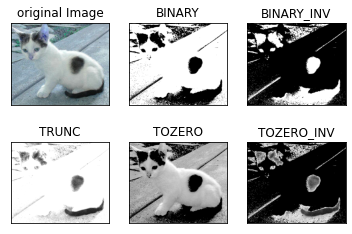

In [2]:
img = cv2.imread('./01_Picture/01_cat.jpg',cv2.IMREAD_COLOR)  
img_gray = cv2.imread('./01_Picture/01_cat.jpg',cv2.IMREAD_GRAYSCALE)

ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)    
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) 
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)     
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']        
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]  

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')  
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Image Smoothing

In [3]:
img = cv2.imread('./01_Picture/04_LenaNoise.png')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Mean Filtering
- Simple average convolution operation

In [4]:
# Simple average convolution operation, add the values in the box, take the average, and replace the value of center 204
blur = cv2.blur(img,(3,3)) # (3,3) Is the size of the kernel, which is usually the odd number 3, 5, 7
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Box Filter
- Basically the same as the mean, you can choose to normalize

In [5]:
# In Python, -1 represents the corresponding value of adaptive fill, where -1 represents the same as color channel number adaptive
box = cv2.boxFilter(img,-1,(3,3),normalize=True)  # If the box filter is normalized, the result is exactly the same as the mean filter
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
box = cv2.boxFilter(img,-1,(3,3),normalize=False)  # The value that is out of bounds is 255
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Gaussian Filter
- Gaussian function, the closer to the mean, the greater its probability.
- The closer it is to the central value, the greater its weight, and the farther it is from the central value, the smaller its weight.

In [7]:
aussian = cv2.GaussianBlur(img,(5,5),1)
cv2.imshow('aussian',aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Median Filtering
- The size of the intermediate element value replaced by the median value after sorting

In [8]:
median = cv2.medianBlur(img,5)
cv2.imshow('median',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Show All Filters

In [11]:
res = np.hstack((blur,aussian,median)) 
#res = np.vstack((blur,aussian,median)) 

cv2.imshow('median vs average', res)      
cv2.waitKey(0)
cv2.destroyAllWindows()

## Etch Operation